# DataFrames Advanced Methods
![Section Title: DataFrames Advanced Methods](title_pict/df_advanced2.png)

In [2]:
import pandas as pd

The following dataframes will be used throughout this section.

In [4]:
df1 = pd.DataFrame({'1C1':[3,4,5], '1C2':[30,40,50], 'col':[300,400,500]}, index=['A', 'B', 'C'])
df1

,1C1,1C2,col
A,3,30,300
B,4,40,400
C,5,50,500


In [5]:
df2 = pd.DataFrame({'2C1':[5,6,9], '2C2':[50,60,90]}, index=['A', 'B', 'C'])
df2

,2C1,2C2
A,5,50
B,6,60
C,9,90


In [6]:
df3 = pd.DataFrame({'3C1':[7,8], '3C2':[70,80], 'col':[700,800]}, index=['C', 'D'])
df3

,3C1,3C2,col
C,7,70,700
D,8,80,800


## concat()
It is used to concatenate dataframes along an axis (horizontally or vertically).

In [8]:
# default axis=0: add as new rows
# two new rows coming from df3: C and D
pd.concat([df1,df3])        

,1C1,1C2,col,3C1,3C2
A,3.0,30.0,300,NaN,NaN
B,4.0,40.0,400,NaN,NaN
C,5.0,50.0,500,NaN,NaN
C,NaN,NaN,700,7.0,70.0
D,NaN,NaN,800,8.0,80.0


In [9]:
# axis=1, add as new columns
# three more rows are coming from df3: 3C1, 3C2, col 
pd.concat([df1,df3], axis=1)   

,1C1,1C2,col,3C1,3C2,col
A,3.0,30.0,300.0,NaN,NaN,NaN
B,4.0,40.0,400.0,NaN,NaN,NaN
C,5.0,50.0,500.0,7.0,70.0,700.0
D,NaN,NaN,NaN,8.0,80.0,800.0


In [10]:
# along only on common columns
pd.concat([df1,df2], join='inner')   # intersection of columns

""
A
B
C
A
B
C


- If the indexes of two dataframes are the same, the column labels are different, and axis=1, then the second dataframe is concatenated horizontally.

In [12]:
# default axis=1: add as a new row
pd.concat([df1,df2], axis=1) 

,1C1,1C2,col,2C1,2C2
A,3,30,300,5,50
B,4,40,400,6,60
C,5,50,500,9,90


## shift()
It is used to shift the data up or down.

In [14]:
df = pd.DataFrame(['A', 'B', 'C', 'D', 'E'])
df

,0
0,A
1,B
2,C
3,D
4,E


In [15]:
# shift the values down by 1 row
df.shift()

,0
0,None
1,A
2,B
3,C
4,D


In [16]:
# shift the values down by 2 rows
df.shift(2)

,0
0,None
1,None
2,A
3,B
4,C


In [17]:
# shift the values up by 1 row
df.shift(-1)

,0
0,B
1,C
2,D
3,E
4,None


In [18]:
# shift the values up by 2 rows
df.shift(-2)

,0
0,C
1,D
2,E
3,None
4,None


## pct_change()
Percentage change between the current and a prior value.

In [20]:
df = pd.DataFrame([500, 400, 600, 150, 180])
df

,0
0,500
1,400
2,600
3,150
4,180


In [21]:
df.pct_change()

,0
0,NaN
1,-0.20
2,0.50
3,-0.75
4,0.20


## rolling()
It is used to do calculations using a rolling window.
- The most commonly used methods following the *rolling()* method are *sum()*, *mean()*, *median()*, and *std()*.

In [23]:
df

,0
0,500
1,400
2,600
3,150
4,180


- rolling() returns a Rolling object.
- The *window* parameter specifies the size of the moving window and must be provided.

In [25]:
# window=3
type(df.rolling(3))

pandas.core.window.rolling.Rolling

In [26]:
df.rolling(window=3).sum()

,0
0,NaN
1,NaN
2,1500.0
3,1150.0
4,930.0


With a moving window size of 3, the row triplets and corresponding values are as follows:
- Rows 0, 1, and 2: The sum of 500, 400, and 600 is 1500.
- Rows 1, 2, and 3: The sum of 400, 600, and 150 is 1150.
- Rows 2, 3, and 4: The sum of 600, 150, and 180 is 930.
  
The first two rolling sum values are NaN (not a number) because a minimum of 3 values is required to compute the sum

## corr()
It returns the correlation coefficients of all column pairs.

Let's find the correlation coefficients for the following DataFrame.

In [29]:
df4 = pd.DataFrame( {'x-values': [1,2,3,4,5], 'square-values': [1,4,9,16,25],'cube-values': [1,8,27,64,125],
                    'random':[9,4,3,1,8], 'reciprocal': [1/1,1/2,1/3,1/4,1/5]})
df4

,x-values,square-values,cube-values,random,reciprocal
0,1,1,1,9,1.000000
1,2,4,8,4,0.500000
2,3,9,27,3,0.333333
3,4,16,64,1,0.250000
4,5,25,125,8,0.200000


In [30]:
df4.corr()

,x-values,square-values,cube-values,random,reciprocal
x-values,1.000000,0.981105,0.943118,-0.233126,-0.901754
square-values,0.981105,1.000000,0.989216,-0.053368,-0.806339
cube-values,0.943118,0.989216,1.000000,0.088235,-0.722074
random,-0.233126,-0.053368,0.088235,1.000000,0.553018
reciprocal,-0.901754,-0.806339,-0.722074,0.553018,1.000000


The correlation matrix can be visualized using Seaborn's heatmap function.

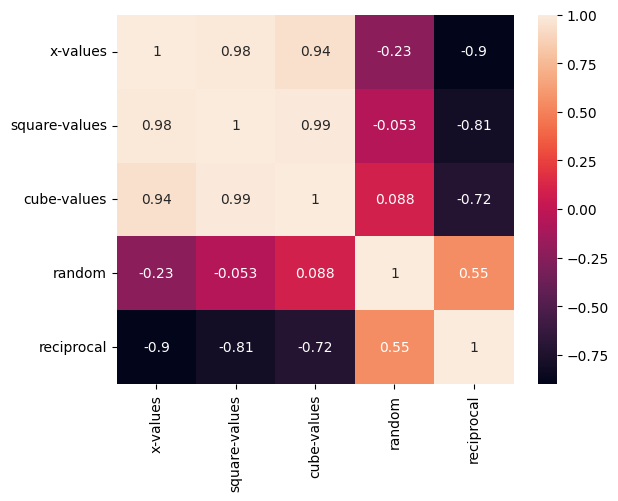

In [32]:
import seaborn as sns
sns.heatmap(df4.corr(), annot=True);

## groupby()
The groupby() function is used to group rows based on column values.
- It is commonly used to apply functions, such as calculating the sum, to each group.

In [34]:
df5 = pd.DataFrame({'gender':['M','F','F','M','F'], 'age':[35, 50, 25, 30, 40]})
df5

,gender,age
0,M,35
1,F,50
2,F,25
3,M,30
4,F,40


- The groupby() method below returns a GroupBy object with two groups, corresponding to 'M' and 'F'.

In [36]:
df5.groupby('gender')

- The sum() method below calculates the total of the age values for the 'M' and 'F' groups.

In [38]:
df5.groupby('gender').sum()

,age
gender,
F,115
M,65


- The mean() method below calculates the mean of the age values for the 'M' and 'F' groups.

In [40]:
df5.groupby('gender').mean()

,age
gender,
F,38.333333
M,32.500000


- The count() method below determines the number of samples (rows) in the 'M' and 'F' groups.

In [42]:
df5.groupby('gender').count()

,age
gender,
F,3
M,2


## agg()
The [agg()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) methodapplies specified functions to values along a given axis.
- Syntax: *pd.agg(function, axis=0)*

In [44]:
df = pd.DataFrame([[7,2], [3,4], [5,6]], columns=['A', 'B'])
df

,A,B
0,7,2
1,3,4
2,5,6


In [45]:
df.agg('sum')

A    15
B    12
dtype: int64

In [46]:
df.agg('sum', axis=1)

0     9
1     7
2    11
dtype: int64

In [47]:
df.agg(['sum', 'min'])

,A,B
sum,15,12
min,3,2


In [48]:
df.agg(lambda x: x**2)

,A,B
0,49,4
1,9,16
2,25,36


In [49]:
df

,A,B
0,7,2
1,3,4
2,5,6


## iterrows()
The [iterrows()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html) method iterates through the rows of a DataFrame, returning each row as an (index, Series) pair.
- It returns a generator object.
- The index represents the row index in the DataFrame.

In [51]:
df.iterrows()

<generator object DataFrame.iterrows at 0x299d82240>

In [52]:
list(df.iterrows())

[(0,
  A    7
  B    2
  Name: 0, dtype: int64),
 (1,
  A    3
  B    4
  Name: 1, dtype: int64),
 (2,
  A    5
  B    6
  Name: 2, dtype: int64)]

In [53]:
list(df.iloc[1:,:].iterrows())

[(1,
  A    3
  B    4
  Name: 1, dtype: int64),
 (2,
  A    5
  B    6
  Name: 2, dtype: int64)]

In [54]:
for idx, row in df.iterrows():
    print(idx, row.values)

0 [7 2]
1 [3 4]
2 [5 6]


## apply()
The [apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) method is used to apply a function to either rows or columns of a DataFrame.
- Syntax: df.apply(function, axis=0)
- The default value of axis is 0, meaning the function is applied to each column.
- If axis=1, the function is applied to each row.
- Additionally, a lambda function can be used within apply() to define the function inline.

We will use the apply() method on the following DataFrame.

In [57]:
df

,A,B
0,7,2
1,3,4
2,5,6


In the following example, a custom square function is used to compute the square of values in each column.

In [59]:
def square_function(x):
    return x**2

In [61]:
df.apply(square_function)

,A,B
0,49,4
1,9,16
2,25,36


In the following example, a lambda function is used to define the square function.

In [63]:
df.apply(lambda x: x**2)

,A,B
0,49,4
1,9,16
2,25,36


In the following example, the sum() function from NumPy is used to compute the sum of values in each column.

In [67]:
import numpy as np
df.apply(np.sum)

A    15
B    12
dtype: int64

In the following example, the sum() function from NumPy is used to compute the sum of values in each row.

In [69]:
df.apply(np.sum, axis=1)

0     9
1     7
2    11
dtype: int64

The following example calculates the weighted sum of particular DataFrame columns using a custom function and a lambda function.

In [77]:
def add_weighted_columns(row):
    return 0.2*row['A'] + 0.8*row['B']

df.apply(add_weighted_columns, axis=1)

0    3.0
1    3.8
2    5.8
dtype: float64

In [79]:
df.apply(lambda  row: 0.2*row['A'] + 0.8*row['B'], axis=1)

0    3.0
1    3.8
2    5.8
dtype: float64

## at()

The at() method is used to access a single value from a DataFrame using a specific row and column label pair.

It is similar to loc, but at() is used for retrieving a single value and does not support slicing.

In [90]:
df

,A,B
0,7,2
1,3,4
2,5,6


In [94]:
df.at[1,'B']

4